In [ ]:
import pandas as pd
from matplotlib import pyplot as plt
#https://www.kaggle.com/datasets/kumarajarshi/life-expectancy-who/data
df = pd.read_csv('data.csv')
df.head(3)

In [ ]:
import math
df_rel = df[['Life expectancy ', 'GDP']]
data = df_rel.to_dict()
l = len(list(data['GDP'].values()))
for k in data:
    data[k] = list(data[k].values())
final_data = [(data['GDP'][i],data['Life expectancy '][i]) for i in range(l)]
data = final_data
data = [(x,y) for x,y in data if not math.isnan(x) and not math.isnan(y)]
print(len(data))
data[:4]

First, we'll do some basic statistics on this dataset to get an understanding for what we're working with.

In [ ]:
gdps = [x[0] for x in data]
les = [x[1] for x in data]
min_gdp = min(gdps)
max_gdp = max(gdps)
min_le = min(les)
max_le = max(les)
avg_gdp = sum(gdps)/len(gdps)
avg_le = sum(les)/len(les)
print(f'Basic Statistics\n- [GDP] min: {min_gdp}; max: {max_gdp}; avg: {avg_gdp}')
print(f'- [LE] min: {min_le}; max: {max_le}; avg: {avg_le}')

In [ ]:
p.plotGeneric(data=([gdps[i] for i in range(len(gdps)) if les[i] > avg_le and gdps[i] > avg_gdp],
                    [les[i] for i in range(len(gdps)) if les[i] > avg_le and gdps[i] > avg_gdp]),label='above both averages',
                    scatterArgs={'s':1.5,'color':'g'},
                    wait=True)
p._legend()
p.plotGeneric(data=([gdps[i] for i in range(len(gdps)) if les[i] > avg_le and gdps[i] <= avg_gdp],
                    [les[i] for i in range(len(gdps)) if les[i] > avg_le and gdps[i] <= avg_gdp]),label='above average LE',
                    scatterArgs={'s':1.5,'color':'y'},
                    wait=True)
p._legend()
p.plotGeneric(data=([gdps[i] for i in range(len(gdps)) if les[i] <= avg_le and gdps[i] > avg_gdp],
                    [les[i] for i in range(len(gdps)) if les[i] <= avg_le and gdps[i] > avg_gdp]),label='above average gdp',
                    scatterArgs={'s':1.5,'color':'b'},
                    wait=True)
p._legend()
p.plotGeneric(data=([gdps[i] for i in range(len(gdps)) if les[i] <= avg_le and gdps[i] <= avg_gdp],
                    [les[i] for i in range(len(gdps)) if les[i] <= avg_le and gdps[i] <= avg_gdp]),label='below both averages',
                    scatterArgs={'s':0.25,'color':'r'},
                    wait=True,
                    chart={'title':'life expectancy (country) vs. GDP, 2000-2015',
                           'xlabel':'GDP ($)',
                           'ylabel':'Life Expectancy (years)'})
plt.plot([1000,70000],[avg_le,avg_le],label='average LE',color='black')
plt.plot([avg_gdp,avg_gdp],[55,84.5],label='average GDP',color='teal')
plt.plot([])
plt.legend()
p._showPlt()

In [ ]:
#todo: knn, other clustering

## Benchmarking `numpy` Functions
- let's benchmark some fundamental `np.linalg` matrix and vector functions to get an understanding of the implementation speed
- we will connect this to the theoretical time complexity of these operations

In [ ]:
import numpy as np
from numpy.linalg import svd
import time
from plot import Plot

from tqdm import tqdm
p = Plot()
rng = np.random.default_rng()
m = rng.random((5,5))
sizes = [2 * (2**k) for k in range(3,10)]
mtxs = [rng.random((s,s)) for s in sizes]
times = []
for m in tqdm(mtxs):
    t = time.time()
    svd(m)
    total_t = time.time() - t
    times.append(total_t)

In [ ]:
import math
import random
chart = {
            'xlabel': f'Dimension of matrix',
            'ylabel': f'Time',
            'title': f'Size vs. Time for SVD for Square Matrix',
            'lobf':1
        }
p.plotGeneric(data=(sizes,times),chart=chart,wait=True,label='time')
p._legend()
p.plotGeneric(data=(sizes,[2.5* (s**3)/10**9 for s in sizes]),label='O(n^3)',wait=1)
p._showPlt(legend=1)

In [ ]:
print(sizes)
print(times)

Above is the previous method for benchmarking. Below we'll demonstrate the new method, using the `Plot` class

100%|██████████| 12/12 [00:00<00:00, 1138.39it/s]

Sizes [2, 4, 8, 16, 32, 64, 128, 256, 512, 1024, 2048, 4096]
Times [2.5033950805664062e-05, 2.86102294921875e-06, 1.1920928955078125e-06, 2.1457672119140625e-06, 2.86102294921875e-06, 4.601478576660156e-05, 4.100799560546875e-05, 6.29425048828125e-05, 0.0001678466796875, 0.00080108642578125, 0.0019299983978271484, 0.007367849349975586]


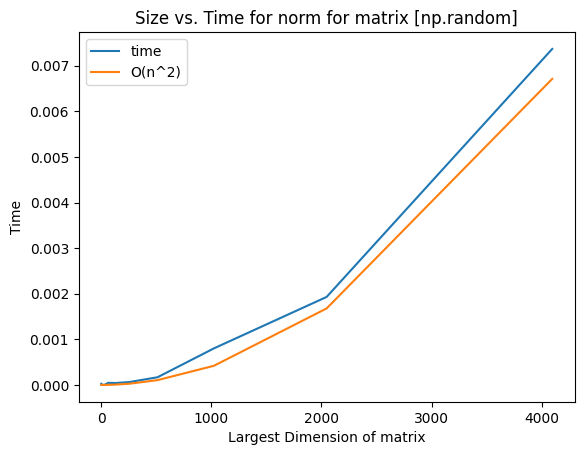

In [7]:
import numpy as np
from plot import Plot
P = Plot()
dims = 2
P.benchmark_np(np.linalg.norm,
               type_='sqmtx',
               gen_info={'range':(2,11),'dims':dims},
               theory_info={'f':lambda x:.4 * x**dims,
               'label':f'O(n^{dims})'}
               )

100%|██████████| 12/12 [00:00<00:00, 532.20it/s]

Sizes [2, 4, 8, 16, 32, 64, 128, 256, 512, 1024, 2048, 4096]
Times [2.3603439331054688e-05, 4.291534423828125e-06, 1.9073486328125e-06, 2.1457672119140625e-06, 2.86102294921875e-06, 4.9114227294921875e-05, 7.200241088867188e-05, 7.104873657226562e-05, 0.0001552104949951172, 0.0005335807800292969, 0.0021181106567382812, 0.01941990852355957]


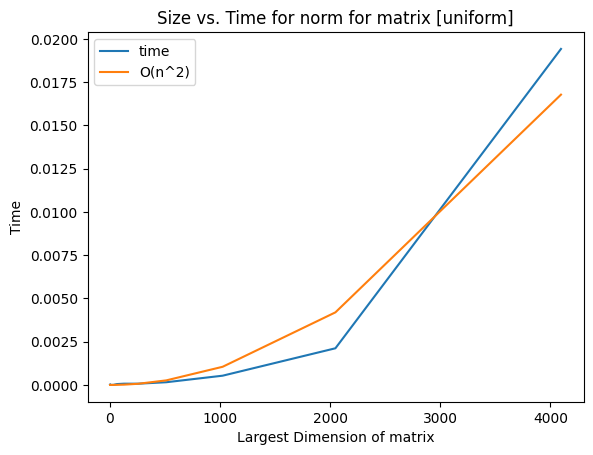

In [3]:
import numpy as np
from plot import Plot
P = Plot()
dims = 2
P.benchmark_np(np.linalg.norm,
               type_='sqmtx',
               gen_info={'range':(2,11),'dims':dims,'rand':'uniform'},
               theory_info={'f':lambda x:x**dims,
               'label':f'O(n^{dims})'}
               )

In [ ]:
from numpy import fromfunction as ff
ff(lambda *x:print('x',x),shape=(8,8))